In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
PACKAGE_DIR = os.path.abspath('../Fork/striatum')
DATA_DIR = os.path.abspath('../../Data/yahoo!_front_page_today_module_user_click_log/R6')
DATA_FILE_NAMES = ['ydata-fp-td-clicks-v1_0.20090501.gz']
MODEL_DIR = os.path.abspath('models')

In [4]:
sys.path.insert(0, PACKAGE_DIR)
from striatum.bandit import hyblinucb
from utils.data import *
from utils.policy import *

In [5]:
data_paths = []
for data_file in DATA_FILE_NAMES:
    data_paths.append(os.path.join(DATA_DIR, data_file))

In [6]:
policy_learner = PolicyLearner(hyblinucb.HybLinUCB, shared_context_dimension=35, unshared_context_dimension=6, 
                               is_shared_context_first=True, seed=0, reset_freq=1000000)
param_grid = {'alpha': np.linspace(0.0, 1.4, 8)}

In [7]:
res = search_param(policy_learner, param_grid, parse_data, data_paths=data_paths, share_context=True)

Parameters: {'alpha': 0.0} | Average Reward: 5.4816% | Computation Time: 7:47:32
Parameters: {'alpha': 0.19999999999999998} | Average Reward: 6.7748% | Computation Time: 10:10:10
Parameters: {'alpha': 0.39999999999999997} | Average Reward: 6.8336% | Computation Time: 6:00:41
Parameters: {'alpha': 0.6} | Average Reward: 6.5022% | Computation Time: 6:05:57
Parameters: {'alpha': 0.7999999999999999} | Average Reward: 6.3473% | Computation Time: 6:04:37
Parameters: {'alpha': 0.9999999999999999} | Average Reward: 6.3421% | Computation Time: 6:14:06
Parameters: {'alpha': 1.2} | Average Reward: 6.1590% | Computation Time: 6:09:11
Parameters: {'alpha': 1.4} | Average Reward: 5.9606% | Computation Time: 6:15:20


In [8]:
if not os.path.isdir(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
with open(os.path.join(MODEL_DIR, 'param_hybrid_linucb.pkl'), 'wb') as file:
    pickle.dump(res, file)

In [10]:
with open(os.path.join(MODEL_DIR, 'param_hybrid_linucb.pkl'), 'rb') as file:
    res = pickle.load(file)

Best Parameter: {'alpha': 0.39999999999999997}
Cumulative CTR: 6.8336%


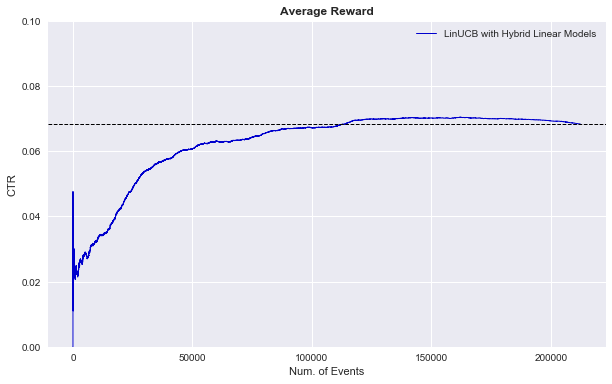

In [11]:
best_param = res['param'][np.argmax(res['avg_reward'])]
cum_ctr = np.max(res['avg_reward'])
print('Best Parameter: {0}\nCumulative CTR: {1:0.4%}'.format(best_param, cum_ctr))
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.plot(res['seq_avg_reward'][np.argmax(res['avg_reward'])], color='mediumblue', 
            label='LinUCB with Hybrid Linear Models', linewidth=1)
ax.axhline(y=cum_ctr, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Num. of Events')
ax.set_ylabel('CTR')
ax.set_ylim([0.0, 0.1])
ax.legend(loc='best')
_ = ax.set_title('Average Reward', fontsize=12, fontweight='bold')